In [1]:
import pandas as pd

data_path = "../DataPreProcessing/.out/license_plates.csv"
image_path = "../OCR/data/LP-characters/images"

data = pd.read_csv(data_path, dtype=str)

In [2]:
data.iloc[0]

plate          MH15TC554
filename        0000.xml
char0                  M
coord0       13-17-27-32
char1                  H
coord1       25-16-38-33
char2                  1
coord2       36-16-46-34
char3                  5
coord3       45-16-55-33
char4                  T
coord4       58-16-69-33
char5                  C
coord5       67-16-78-33
char6                  5
coord6       82-16-92-33
char7                  5
coord7      91-16-100-33
char8                  4
coord8      98-16-109-33
char9                NaN
coord9               NaN
char10               NaN
coord10              NaN
char11               NaN
coord11              NaN
char12               NaN
coord12              NaN
char13               NaN
coord13              NaN
char14               NaN
coord14              NaN
char15               NaN
coord15              NaN
char16               NaN
coord16              NaN
char17               NaN
coord17              NaN
char18               NaN
coord18              NaN


In [3]:
import PIL as pil
from PIL import Image
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2

def prepare_img(img, xmin, ymin, xmax, ymax):
        # crop image to bounding box
        char_img = img[ymin:ymax, xmin:xmax]

        # scale image
        char_img = cv2.resize(char_img, (64, 64))
        #plt.figure()
        hog_img = hog(char_img, orientations=9, pixels_per_cell=(4,4), cells_per_block=(1, 1))

        return hog_img

def grab_bbs(row):
    img = cv2.imread(f"{image_path}/{row['filename'].split('.')[0]}.png", 0)

    bbs = []
    charcoords = row[2:]
    charcoords = charcoords[charcoords.notnull()]
    
    for i in range(0, len(charcoords), 2):
        char = charcoords[i]
        coords = charcoords[i+1]
        
        #xmin, ymin, xmax, ymax = [int(x) for x in coords.split("-")]

        #plt.imshow(hog_img,cmap='gray')

        hog_img = prepare_img(img, *map(int, coords.split("-")))

        bbs.append((char, hog_img))

    return bbs

In [4]:
grab_bbs(data.iloc[5])

[('H',
  array([0.0698168 , 0.55291212, 0.55291212, ..., 0.        , 0.        ,
         0.        ])),
 ('R',
  array([0.39750583, 0.        , 0.5297764 , ..., 0.        , 0.        ,
         0.31085804])),
 ('6',
  array([0.        , 0.        , 0.        , ..., 0.47953199, 0.47953199,
         0.        ])),
 ('9',
  array([0.41750283, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ])),
 ('6',
  array([0.5       , 0.        , 0.        , ..., 0.35659201, 0.35659201,
         0.        ])),
 ('9',
  array([0.4472136, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ])),
 ('6',
  array([0.15892883, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ])),
 ('9',
  array([0.26411931, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]))]

In [5]:
hogs = None

i = 0
for im in data.iterrows():
    print(f"{i}/{len(data)}", "\t"*3, end="\r")
    hog_features = grab_bbs(im[1])

    if hogs is None:
        num_features = len(hog_features[0][1])
        
        hogs = pd.DataFrame(columns=['char'] + [f"hog_{i}" for i in range(num_features)] + ['filename'])
    
    for char, hog_feat in hog_features:
        hogs = pd.concat([hogs, pd.DataFrame([[char] + list(hog_feat) + [im[1]['filename']]], columns=hogs.columns)])

    i += 1
hogs.to_csv("data/.out/license_plate_hogs.csv", index=False)

KeyboardInterrupt: 

In [ ]:
hogs = pd.read_csv("data/.out/license_plate_hogs.csv")

In [ ]:
# find rows with a specific character
a = data.filter(like='char')
a[a.isin([2.0]).any(axis=1)]

,char0,char1,char2,char3,char4,char5,char6,char7,char8,char9,...,char18,char19,char20,char21,char22,char23,char24,char25,char26,char27


In [ ]:
data.iloc[100]

plate             KL65E1000
filename           0112.xml
char0                     K
coord0       109-19-174-128
char1                     L
coord1       174-21-242-132
char2                     6
coord2       284-20-342-128
char3                     5
coord3       344-19-416-126
char4                     E
coord4       79-156-152-270
char5                     1
coord5      181-156-244-264
char6                     0
coord6      244-155-308-263
char7                     0
coord7      311-155-377-261
char8                     0
coord8      377-152-443-261
char9                   NaN
coord9                  NaN
char10                  NaN
coord10                 NaN
char11                  NaN
coord11                 NaN
char12                  NaN
coord12                 NaN
char13                  NaN
coord13                 NaN
char14                  NaN
coord14                 NaN
char15                  NaN
coord15                 NaN
char16                  NaN
coord16             

In [ ]:
hogs[hogs['char'] == "2"]

,char,hog_0,hog_1,hog_2,hog_3,hog_4,hog_5,hog_6,hog_7,hog_8,...,hog_2295,hog_2296,hog_2297,hog_2298,hog_2299,hog_2300,hog_2301,hog_2302,hog_2303,filename
12,2,0.493280,0.377620,0.477656,0.377620,0.493280,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0001.xml
62,2,0.373865,0.373865,0.341366,0.211706,0.373865,0.373865,0.373865,0.000000,0.373865,...,0.039696,0.000000,0.576895,0.576895,0.576895,0.000000,0.000000,0.000000,0.000000,0008.xml
76,2,0.284548,0.000000,0.000000,0.149970,0.584327,0.584327,0.276531,0.370399,0.000000,...,0.013467,0.000000,0.000000,0.707043,0.707043,0.000000,0.000000,0.000000,0.000000,0010.xml
92,2,0.454859,0.000000,0.415227,0.454859,0.000000,0.454859,0.454859,0.000000,0.000000,...,0.491319,0.491319,0.000000,0.221930,0.491319,0.000000,0.357852,0.000000,0.313857,0012.xml
138,2,0.480835,0.000000,0.000000,0.274211,0.480835,0.480835,0.000000,0.480835,0.000000,...,0.614588,0.000000,0.000000,0.000000,0.367295,0.164259,0.287534,0.000000,0.614588,0016.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2,0.000000,0.000000,0.000000,0.498850,0.866688,0.000000,0.000000,0.000000,0.000000,...,0.460719,0.627590,0.000000,0.000000,0.627590,0.000000,0.000000,0.000000,0.000000,0232.xml
1985,2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.385852,0.000000,0.000000,0.000000,0.450449,0.450449,0.198744,0.450449,0.450449,0232.xml
1994,2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0233.xml
1999,2,0.626292,0.000000,0.464238,0.000000,0.626292,0.000000,0.000000,0.000000,0.000000,...,0.509073,0.509073,0.471735,0.000000,0.509073,0.000000,0.000000,0.000000,0.000000,0234.xml


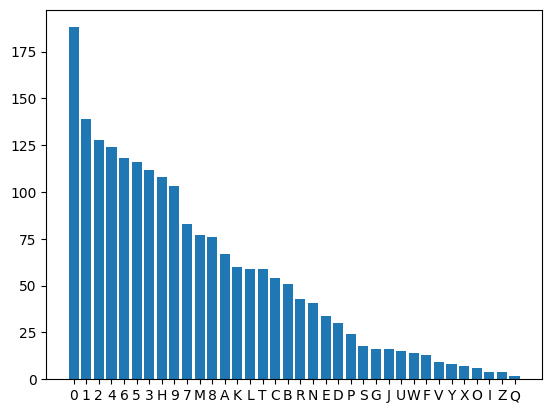

In [ ]:
# Plot Label Distribution
import matplotlib.pyplot as plt

lbl_distr = hogs['char'].value_counts()

plt.bar([str(x) for x in lbl_distr.index.to_list()], lbl_distr.values)

plt.show()

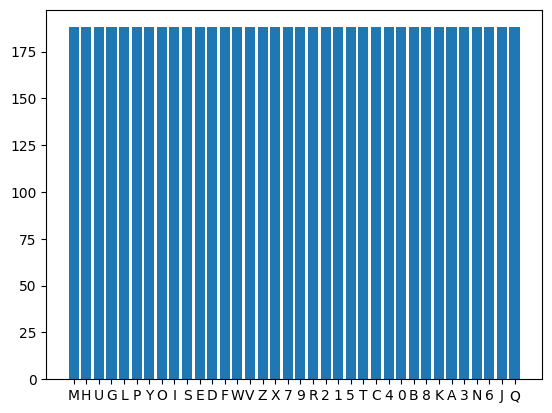

In [ ]:
# upsample minority classes
from sklearn.utils import resample

num_majority = hogs[hogs['char'] == max(hogs['char'], key=hogs['char'].value_counts().get)]


hogs_upsampled = hogs.copy()
for char in hogs['char'].unique():
    if len(hogs[hogs['char'] == char]) < len(num_majority):
        hogs_upsampled = pd.concat([hogs_upsampled, resample(hogs[hogs['char'] == char], replace=True, n_samples=len(num_majority) - len(hogs[hogs['char'] == char]))])

lbl_distr = hogs_upsampled['char'].value_counts()

plt.bar([str(x) for x in lbl_distr.index.to_list()], lbl_distr.values)

plt.show()

## Training time

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = hogs_upsampled.drop(columns=['char', 'filename'])
y = hogs_upsampled['char']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
lreg = LogisticRegression()
clf = lreg.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy {:.2f}'.format(clf.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy 0.99
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       1.00      0.93      0.96        42
           2       1.00      1.00      1.00        40
           3       1.00      0.98      0.99        45
           4       1.00      0.93      0.97        46
           5       0.95      0.97      0.96        40
           6       1.00      0.94      0.97        34
           7       0.97      1.00      0.99        38
           8       0.97      0.94      0.96        35
           9       0.97      1.00      0.99        34
           A       0.98      1.00      0.99        42
           B       1.00      0.97      0.98        31
           C       0.98      1.00      0.99        42
           D       0.95      1.00      0.97        38
           E       1.00      1.00      1.00        32
           F       1.00      1.00      1.00        43
           G       0.97      1.00      0.99        39
           H 

c:\Users\ranyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import joblib
joblib.dump(clf, "model/lreg_char_class.pkl")

['model/lreg_char_class.pkl']

## Misc

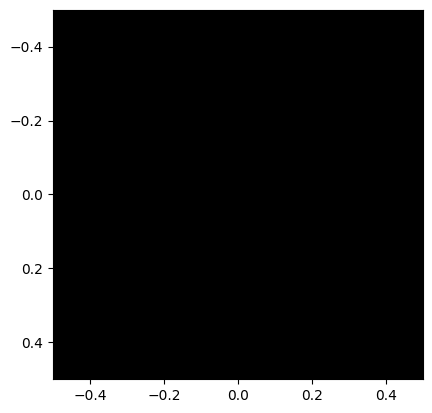

In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog


im_test = cv2.imread('ocr_data/train/A/roi107644.jpg',0)
_,hog_img= hog(im_test,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1),visualize=True)
plt.imshow(hog_img,cmap='gray')